# Transformers

In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/scratch/pmc026/nchoong/run_conda/522212'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-10-05 19:53:51.012344: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-05 19:53:51.025556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 19:53:51.041533: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 19:53:51.046456: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 19:53:51.061486: I tensorflow/core/platform/cpu_feature_guar

2024-10-05 19:53:53.422976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "yelp", sample_size=100_000
)

Loading train tensors:   0%|          | 0/146 [00:00<?, ?it/s]

Loading train tensors:   1%|          | 1/146 [00:03<07:15,  3.00s/it]

Loading train tensors:   1%|▏         | 2/146 [00:06<07:24,  3.09s/it]

Loading train tensors:   2%|▏         | 3/146 [00:09<07:19,  3.07s/it]

Loading train tensors:   3%|▎         | 4/146 [00:12<07:14,  3.06s/it]

Loading train tensors:   3%|▎         | 5/146 [00:15<07:11,  3.06s/it]

Loading train tensors:   4%|▍         | 6/146 [00:18<07:06,  3.04s/it]

Loading train tensors:   5%|▍         | 7/146 [00:21<07:00,  3.02s/it]

Loading train tensors:   5%|▌         | 8/146 [00:24<06:55,  3.01s/it]

Loading train tensors:   6%|▌         | 9/146 [00:27<06:48,  2.99s/it]

Loading train tensors:   7%|▋         | 10/146 [00:30<06:43,  2.96s/it]

Loading train tensors:   8%|▊         | 11/146 [00:33<06:37,  2.94s/it]

Loading train tensors:   8%|▊         | 12/146 [00:35<06:31,  2.92s/it]

Loading train tensors:   9%|▉         | 13/146 [00:38<06:23,  2.88s/it]

Loading train tensors:  10%|▉         | 14/146 [00:41<06:17,  2.86s/it]

Loading train tensors:  10%|█         | 15/146 [00:44<06:16,  2.87s/it]

Loading train tensors:  11%|█         | 16/146 [00:47<06:15,  2.89s/it]

Loading train tensors:  12%|█▏        | 17/146 [00:50<06:11,  2.88s/it]

Loading train tensors:  12%|█▏        | 18/146 [00:53<06:09,  2.88s/it]

Loading train tensors:  13%|█▎        | 19/146 [00:55<06:04,  2.87s/it]

Loading train tensors:  14%|█▎        | 20/146 [00:58<06:02,  2.88s/it]

Loading train tensors:  14%|█▍        | 21/146 [01:01<06:00,  2.88s/it]

Loading train tensors:  15%|█▌        | 22/146 [01:04<05:59,  2.90s/it]

Loading train tensors:  16%|█▌        | 23/146 [01:07<05:56,  2.90s/it]

Loading train tensors:  16%|█▋        | 24/146 [01:10<05:55,  2.91s/it]

Loading train tensors:  17%|█▋        | 25/146 [01:13<05:47,  2.88s/it]

Loading train tensors:  18%|█▊        | 26/146 [01:16<05:42,  2.86s/it]

Loading train tensors:  18%|█▊        | 27/146 [01:19<05:42,  2.88s/it]

Loading train tensors:  19%|█▉        | 28/146 [01:21<05:40,  2.89s/it]

Loading train tensors:  20%|█▉        | 29/146 [01:24<05:38,  2.89s/it]

Loading train tensors:  21%|██        | 30/146 [01:27<05:35,  2.89s/it]

Loading train tensors:  21%|██        | 31/146 [01:30<05:32,  2.89s/it]

Loading train tensors:  22%|██▏       | 32/146 [01:33<05:29,  2.89s/it]

Loading train tensors:  23%|██▎       | 33/146 [01:36<05:25,  2.88s/it]

Loading train tensors:  23%|██▎       | 34/146 [01:39<05:24,  2.89s/it]

Loading train tensors:  24%|██▍       | 35/146 [01:42<05:20,  2.89s/it]

Loading train tensors:  25%|██▍       | 36/146 [01:45<05:18,  2.90s/it]

Loading train tensors:  25%|██▌       | 37/146 [01:47<05:15,  2.90s/it]

Loading train tensors:  26%|██▌       | 38/146 [01:50<05:10,  2.88s/it]

Loading train tensors:  27%|██▋       | 39/146 [01:53<05:06,  2.86s/it]

Loading train tensors:  27%|██▋       | 40/146 [01:56<05:04,  2.87s/it]

Loading train tensors:  28%|██▊       | 41/146 [01:59<05:02,  2.88s/it]

Loading train tensors:  29%|██▉       | 42/146 [02:02<04:59,  2.88s/it]

Loading train tensors:  29%|██▉       | 43/146 [02:05<04:57,  2.88s/it]

Loading train tensors:  30%|███       | 44/146 [02:08<04:54,  2.89s/it]

Loading train tensors:  31%|███       | 45/146 [02:11<04:54,  2.91s/it]

Loading train tensors:  32%|███▏      | 46/146 [02:14<04:52,  2.92s/it]

Loading train tensors:  32%|███▏      | 47/146 [02:16<04:49,  2.92s/it]

Loading train tensors:  33%|███▎      | 48/146 [02:19<04:46,  2.92s/it]

Loading train tensors:  34%|███▎      | 49/146 [02:22<04:43,  2.92s/it]

Loading train tensors:  34%|███▍      | 50/146 [02:25<04:39,  2.92s/it]

Loading train tensors:  35%|███▍      | 51/146 [02:28<04:37,  2.92s/it]

Loading train tensors:  36%|███▌      | 52/146 [02:31<04:36,  2.94s/it]

Loading train tensors:  36%|███▋      | 53/146 [02:34<04:32,  2.94s/it]

Loading train tensors:  37%|███▋      | 54/146 [02:37<04:29,  2.93s/it]

Loading train tensors:  38%|███▊      | 55/146 [02:40<04:26,  2.93s/it]

Loading train tensors:  38%|███▊      | 56/146 [02:43<04:23,  2.93s/it]

Loading train tensors:  39%|███▉      | 57/146 [02:46<04:20,  2.92s/it]

Loading train tensors:  40%|███▉      | 58/146 [02:49<04:17,  2.92s/it]

Loading train tensors:  40%|████      | 59/146 [02:52<04:13,  2.91s/it]

Loading train tensors:  41%|████      | 60/146 [02:54<04:11,  2.93s/it]

Loading train tensors:  42%|████▏     | 61/146 [02:57<04:09,  2.93s/it]

Loading train tensors:  42%|████▏     | 62/146 [03:00<04:05,  2.93s/it]

Loading train tensors:  43%|████▎     | 63/146 [03:03<04:02,  2.92s/it]

Loading train tensors:  44%|████▍     | 64/146 [03:06<04:01,  2.94s/it]

Loading train tensors:  45%|████▍     | 65/146 [03:09<03:57,  2.93s/it]

Loading train tensors:  45%|████▌     | 66/146 [03:12<03:53,  2.92s/it]

Loading train tensors:  46%|████▌     | 67/146 [03:15<03:50,  2.91s/it]

Loading train tensors:  47%|████▋     | 68/146 [03:18<03:46,  2.91s/it]

Loading train tensors:  47%|████▋     | 69/146 [03:21<03:44,  2.91s/it]

Loading train tensors:  48%|████▊     | 70/146 [03:24<03:42,  2.92s/it]

Loading train tensors:  49%|████▊     | 71/146 [03:27<03:39,  2.92s/it]

Loading train tensors:  49%|████▉     | 72/146 [03:29<03:35,  2.91s/it]

Loading train tensors:  50%|█████     | 73/146 [03:32<03:33,  2.92s/it]

Loading train tensors:  51%|█████     | 74/146 [03:35<03:30,  2.92s/it]

Loading train tensors:  51%|█████▏    | 75/146 [03:38<03:27,  2.92s/it]

Loading train tensors:  52%|█████▏    | 76/146 [03:41<03:24,  2.92s/it]

Loading train tensors:  53%|█████▎    | 77/146 [03:44<03:20,  2.91s/it]

Loading train tensors:  53%|█████▎    | 78/146 [03:47<03:17,  2.91s/it]

Loading train tensors:  54%|█████▍    | 79/146 [03:50<03:14,  2.90s/it]

Loading train tensors:  55%|█████▍    | 80/146 [03:53<03:11,  2.90s/it]

Loading train tensors:  55%|█████▌    | 81/146 [03:56<03:08,  2.90s/it]

Loading train tensors:  56%|█████▌    | 82/146 [03:59<03:05,  2.91s/it]

Loading train tensors:  57%|█████▋    | 83/146 [04:01<03:03,  2.91s/it]

Loading train tensors:  58%|█████▊    | 84/146 [04:04<03:00,  2.91s/it]

Loading train tensors:  58%|█████▊    | 85/146 [04:07<02:57,  2.90s/it]

Loading train tensors:  59%|█████▉    | 86/146 [04:10<02:54,  2.90s/it]

Loading train tensors:  60%|█████▉    | 87/146 [04:13<02:51,  2.90s/it]

Loading train tensors:  60%|██████    | 88/146 [04:16<02:48,  2.91s/it]

Loading train tensors:  61%|██████    | 89/146 [04:19<02:45,  2.91s/it]

Loading train tensors:  62%|██████▏   | 90/146 [04:22<02:43,  2.91s/it]

Loading train tensors:  62%|██████▏   | 91/146 [04:25<02:39,  2.91s/it]

Loading train tensors:  63%|██████▎   | 92/146 [04:28<02:37,  2.92s/it]

Loading train tensors:  64%|██████▎   | 93/146 [04:29<02:09,  2.44s/it]

Loading train tensors:  64%|██████▍   | 94/146 [04:32<02:14,  2.58s/it]

Loading train tensors:  65%|██████▌   | 95/146 [04:35<02:17,  2.70s/it]

Loading train tensors:  66%|██████▌   | 96/146 [04:38<02:18,  2.77s/it]

Loading train tensors:  66%|██████▋   | 97/146 [04:41<02:18,  2.82s/it]

Loading train tensors:  67%|██████▋   | 98/146 [04:44<02:17,  2.86s/it]

Loading train tensors:  68%|██████▊   | 99/146 [04:47<02:16,  2.89s/it]

Loading train tensors:  68%|██████▊   | 100/146 [04:50<02:14,  2.91s/it]

Loading train tensors:  69%|██████▉   | 101/146 [04:53<02:11,  2.92s/it]

Loading train tensors:  70%|██████▉   | 102/146 [04:56<02:08,  2.93s/it]

Loading train tensors:  71%|███████   | 103/146 [04:58<02:06,  2.94s/it]

Loading train tensors:  71%|███████   | 104/146 [05:01<02:03,  2.95s/it]

Loading train tensors:  72%|███████▏  | 105/146 [05:04<02:00,  2.94s/it]

Loading train tensors:  73%|███████▎  | 106/146 [05:07<01:58,  2.95s/it]

Loading train tensors:  73%|███████▎  | 107/146 [05:10<01:54,  2.95s/it]

Loading train tensors:  74%|███████▍  | 108/146 [05:13<01:51,  2.93s/it]

Loading train tensors:  75%|███████▍  | 109/146 [05:16<01:48,  2.93s/it]

Loading train tensors:  75%|███████▌  | 110/146 [05:19<01:45,  2.93s/it]

Loading train tensors:  76%|███████▌  | 111/146 [05:22<01:42,  2.92s/it]

Loading train tensors:  77%|███████▋  | 112/146 [05:25<01:38,  2.91s/it]

Loading train tensors:  77%|███████▋  | 113/146 [05:28<01:35,  2.90s/it]

Loading train tensors:  78%|███████▊  | 114/146 [05:31<01:32,  2.89s/it]

Loading train tensors:  79%|███████▉  | 115/146 [05:34<01:29,  2.90s/it]

Loading train tensors:  79%|███████▉  | 116/146 [05:36<01:27,  2.90s/it]

Loading train tensors:  80%|████████  | 117/146 [05:39<01:24,  2.90s/it]

Loading train tensors:  81%|████████  | 118/146 [05:42<01:20,  2.89s/it]

Loading train tensors:  82%|████████▏ | 119/146 [05:45<01:17,  2.88s/it]

Loading train tensors:  82%|████████▏ | 120/146 [05:48<01:14,  2.86s/it]

Loading train tensors:  83%|████████▎ | 121/146 [05:51<01:11,  2.86s/it]

Loading train tensors:  84%|████████▎ | 122/146 [05:54<01:08,  2.87s/it]

Loading train tensors:  84%|████████▍ | 123/146 [05:56<01:05,  2.86s/it]

Loading train tensors:  85%|████████▍ | 124/146 [05:59<01:03,  2.88s/it]

Loading train tensors:  86%|████████▌ | 125/146 [06:02<01:00,  2.88s/it]

Loading train tensors:  86%|████████▋ | 126/146 [06:05<00:57,  2.89s/it]

Loading train tensors:  87%|████████▋ | 127/146 [06:08<00:55,  2.90s/it]

Loading train tensors:  88%|████████▊ | 128/146 [06:11<00:52,  2.90s/it]

Loading train tensors:  88%|████████▊ | 129/146 [06:14<00:49,  2.88s/it]

Loading train tensors:  89%|████████▉ | 130/146 [06:17<00:46,  2.88s/it]

Loading train tensors:  90%|████████▉ | 131/146 [06:20<00:43,  2.89s/it]

Loading train tensors:  90%|█████████ | 132/146 [06:23<00:40,  2.90s/it]

Loading train tensors:  91%|█████████ | 133/146 [06:25<00:37,  2.91s/it]

Loading train tensors:  92%|█████████▏| 134/146 [06:28<00:34,  2.91s/it]

Loading train tensors:  92%|█████████▏| 135/146 [06:31<00:32,  2.91s/it]

Loading train tensors:  93%|█████████▎| 136/146 [06:34<00:29,  2.93s/it]

Loading train tensors:  94%|█████████▍| 137/146 [06:37<00:26,  2.92s/it]

Loading train tensors:  95%|█████████▍| 138/146 [06:40<00:23,  2.92s/it]

Loading train tensors:  95%|█████████▌| 139/146 [06:43<00:20,  2.93s/it]

Loading train tensors:  96%|█████████▌| 140/146 [06:46<00:17,  2.92s/it]

Loading train tensors:  97%|█████████▋| 141/146 [06:49<00:14,  2.92s/it]

Loading train tensors:  97%|█████████▋| 142/146 [06:52<00:11,  2.91s/it]

Loading train tensors:  98%|█████████▊| 143/146 [06:55<00:08,  2.92s/it]

Loading train tensors:  99%|█████████▊| 144/146 [06:58<00:05,  2.92s/it]

Loading train tensors:  99%|█████████▉| 145/146 [07:01<00:02,  2.93s/it]

Loading train tensors: 100%|██████████| 146/146 [07:03<00:00,  2.80s/it]

Loading train tensors: 100%|██████████| 146/146 [07:03<00:00,  2.90s/it]

Sample size:  75000


Loading val tensors:   0%|          | 0/37 [00:00<?, ?it/s]

Loading val tensors:   3%|▎         | 1/37 [00:02<01:47,  2.98s/it]

Loading val tensors:   5%|▌         | 2/37 [00:05<01:44,  2.97s/it]

Loading val tensors:   8%|▊         | 3/37 [00:08<01:40,  2.96s/it]

Loading val tensors:  11%|█         | 4/37 [00:11<01:37,  2.96s/it]

Loading val tensors:  14%|█▎        | 5/37 [00:14<01:34,  2.96s/it]

Loading val tensors:  16%|█▌        | 6/37 [00:17<01:31,  2.96s/it]

Loading val tensors:  19%|█▉        | 7/37 [00:20<01:29,  2.97s/it]

Loading val tensors:  22%|██▏       | 8/37 [00:23<01:25,  2.96s/it]

Loading val tensors:  24%|██▍       | 9/37 [00:26<01:22,  2.96s/it]

Loading val tensors:  27%|██▋       | 10/37 [00:29<01:19,  2.94s/it]

Loading val tensors:  30%|██▉       | 11/37 [00:32<01:16,  2.94s/it]

Loading val tensors:  32%|███▏      | 12/37 [00:35<01:13,  2.94s/it]

Loading val tensors:  35%|███▌      | 13/37 [00:38<01:10,  2.95s/it]

Loading val tensors:  38%|███▊      | 14/37 [00:41<01:07,  2.93s/it]

Loading val tensors:  41%|████      | 15/37 [00:44<01:04,  2.93s/it]

Loading val tensors:  43%|████▎     | 16/37 [00:47<01:01,  2.93s/it]

Loading val tensors:  46%|████▌     | 17/37 [00:50<00:58,  2.94s/it]

Loading val tensors:  49%|████▊     | 18/37 [00:53<00:56,  2.98s/it]

Loading val tensors:  51%|█████▏    | 19/37 [00:56<00:53,  2.99s/it]

Loading val tensors:  54%|█████▍    | 20/37 [00:59<00:51,  3.01s/it]

Loading val tensors:  57%|█████▋    | 21/37 [01:02<00:48,  3.00s/it]

Loading val tensors:  59%|█████▉    | 22/37 [01:05<00:44,  2.99s/it]

Loading val tensors:  62%|██████▏   | 23/37 [01:08<00:41,  2.97s/it]

Loading val tensors:  65%|██████▍   | 24/37 [01:11<00:38,  2.96s/it]

Loading val tensors:  68%|██████▊   | 25/37 [01:13<00:35,  2.95s/it]

Loading val tensors:  70%|███████   | 26/37 [01:16<00:32,  2.94s/it]

Loading val tensors:  73%|███████▎  | 27/37 [01:19<00:29,  2.94s/it]

Loading val tensors:  76%|███████▌  | 28/37 [01:22<00:26,  2.94s/it]

Loading val tensors:  78%|███████▊  | 29/37 [01:25<00:23,  2.93s/it]

Loading val tensors:  81%|████████  | 30/37 [01:28<00:20,  2.92s/it]

Loading val tensors:  84%|████████▍ | 31/37 [01:31<00:17,  2.92s/it]

Loading val tensors:  86%|████████▋ | 32/37 [01:34<00:14,  2.93s/it]

Loading val tensors:  89%|████████▉ | 33/37 [01:37<00:11,  2.92s/it]

Loading val tensors:  92%|█████████▏| 34/37 [01:40<00:08,  2.93s/it]

Loading val tensors:  95%|█████████▍| 35/37 [01:43<00:05,  2.92s/it]

Loading val tensors:  97%|█████████▋| 36/37 [01:46<00:02,  2.92s/it]

Loading val tensors: 100%|██████████| 37/37 [01:47<00:00,  2.44s/it]

Loading val tensors: 100%|██████████| 37/37 [01:47<00:00,  2.90s/it]

Loading test tensors:   0%|          | 0/13 [00:00<?, ?it/s]

Loading test tensors:   8%|▊         | 1/13 [00:02<00:33,  2.79s/it]

Loading test tensors:  15%|█▌        | 2/13 [00:05<00:30,  2.80s/it]

Loading test tensors:  23%|██▎       | 3/13 [00:08<00:28,  2.80s/it]

Loading test tensors:  31%|███       | 4/13 [00:11<00:25,  2.81s/it]

Loading test tensors:  38%|███▊      | 5/13 [00:14<00:22,  2.81s/it]

Loading test tensors:  46%|████▌     | 6/13 [00:16<00:19,  2.81s/it]

Loading test tensors:  54%|█████▍    | 7/13 [00:19<00:17,  2.90s/it]

Loading test tensors:  62%|██████▏   | 8/13 [00:23<00:14,  2.96s/it]

Loading test tensors:  69%|██████▉   | 9/13 [00:26<00:11,  2.99s/it]

Loading test tensors:  77%|███████▋  | 10/13 [00:29<00:09,  3.02s/it]

Loading test tensors:  85%|████████▍ | 11/13 [00:32<00:06,  3.04s/it]

Loading test tensors:  92%|█████████▏| 12/13 [00:35<00:03,  3.06s/it]

Loading test tensors: 100%|██████████| 13/13 [00:36<00:00,  2.45s/it]

Loading test tensors: 100%|██████████| 13/13 [00:36<00:00,  2.80s/it]

Test size:  38000
Sampled train tensor shape:  torch.Size([300000, 128, 768])
Sampled val tensor shape:  torch.Size([75000, 128, 768])
Sampled test tensor shape:  torch.Size([38000, 128, 768])


Train, Val, Test size:  80000 20000 20000
pos:  39792
neg:  40208
pos:  10092
neg:  9908
pos:  9969
neg:  10031


## Classical

In [7]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=2**8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit",
    batch=True,
    circuit_type="pennylane",
    encoding_type="angle_amp",
    pennylane_args={
        "hadamard": False,
        "encoder": "amplitude",
        "angle_rot": "X",
        "entangler": "basic",
        "rot": "Z",
        "imprimitive": "X",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=256, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
        (unsqueeze1): Linear(in_features=4, out_features=128, bias=True)
        (unsqueeze2): Linear(in_features

Epoch 01: 62.73batch/s, Epoch = 21m 15s, Loss = 0.3135|0.2502, Acc = 0.863|0.898, AUC = 93.980|96.413


Epoch 02: 66.01batch/s, Epoch = 20m 11s, Loss = 0.2405|0.3135, Acc = 0.900|0.877, AUC = 96.474|97.004


Epoch 03: 66.04batch/s, Epoch = 20m 11s, Loss = 0.2215|0.2169, Acc = 0.909|0.914, AUC = 97.010|97.392


Epoch 04: 66.40batch/s, Epoch = 20m 4s, Loss = 0.2072|0.2142, Acc = 0.915|0.914, AUC = 97.381|97.571


Epoch 05: 66.96batch/s, Epoch = 19m 54s, Loss = 0.1986|0.2085, Acc = 0.920|0.919, AUC = 97.589|97.570


Epoch 06: 66.52batch/s, Epoch = 20m 2s, Loss = 0.1733|0.1994, Acc = 0.931|0.923, AUC = 98.159|97.752


Epoch 07: 66.77batch/s, Epoch = 19m 58s, Loss = 0.1691|0.2060, Acc = 0.933|0.923, AUC = 98.246|97.780


Epoch 08: 66.11batch/s, Epoch = 20m 10s, Loss = 0.1657|0.2010, Acc = 0.934|0.924, AUC = 98.315|97.809


Epoch 09: 66.35batch/s, Epoch = 20m 5s, Loss = 0.1631|0.2014, Acc = 0.935|0.923, AUC = 98.365|97.793


Epoch 10: 66.68batch/s, Epoch = 19m 59s, Loss = 0.1603|0.2062, Acc = 0.936|0.922, AUC = 98.419|97.803


Epoch 11: 66.69batch/s, Epoch = 19m 59s, Loss = 0.1555|0.2039, Acc = 0.938|0.924, AUC = 98.513|97.828


Epoch 12: 66.65batch/s, Epoch = 20m 0s, Loss = 0.1546|0.2054, Acc = 0.939|0.925, AUC = 98.526|97.833


Epoch 13: 65.64batch/s, Epoch = 20m 18s, Loss = 0.1534|0.2043, Acc = 0.939|0.925, AUC = 98.550|97.823


Epoch 14: 66.22batch/s, Epoch = 20m 8s, Loss = 0.1533|0.2053, Acc = 0.940|0.925, AUC = 98.552|97.819


Epoch 15: 66.26batch/s, Epoch = 20m 7s, Loss = 0.1530|0.2050, Acc = 0.939|0.925, AUC = 98.556|97.826


Epoch 16: 66.47batch/s, Epoch = 20m 3s, Loss = 0.1529|0.2051, Acc = 0.940|0.924, AUC = 98.555|97.826


Epoch 17: 66.51batch/s, Epoch = 20m 2s, Loss = 0.1526|0.2051, Acc = 0.939|0.925, AUC = 98.564|97.826


Epoch 18: 66.29batch/s, Epoch = 20m 6s, Loss = 0.1519|0.2053, Acc = 0.940|0.925, AUC = 98.575|97.826


Epoch 19: 65.85batch/s, Epoch = 20m 14s, Loss = 0.1524|0.2053, Acc = 0.940|0.925, AUC = 98.566|97.825


Epoch 20: 66.70batch/s, Epoch = 19m 59s, Loss = 0.1518|0.2056, Acc = 0.940|0.925, AUC = 98.578|97.825
TOTAL TIME = 24178.25s
BEST ACC = 0.92% AT EPOCH 13
BEST AUC = 97.83 AT EPOCH 12


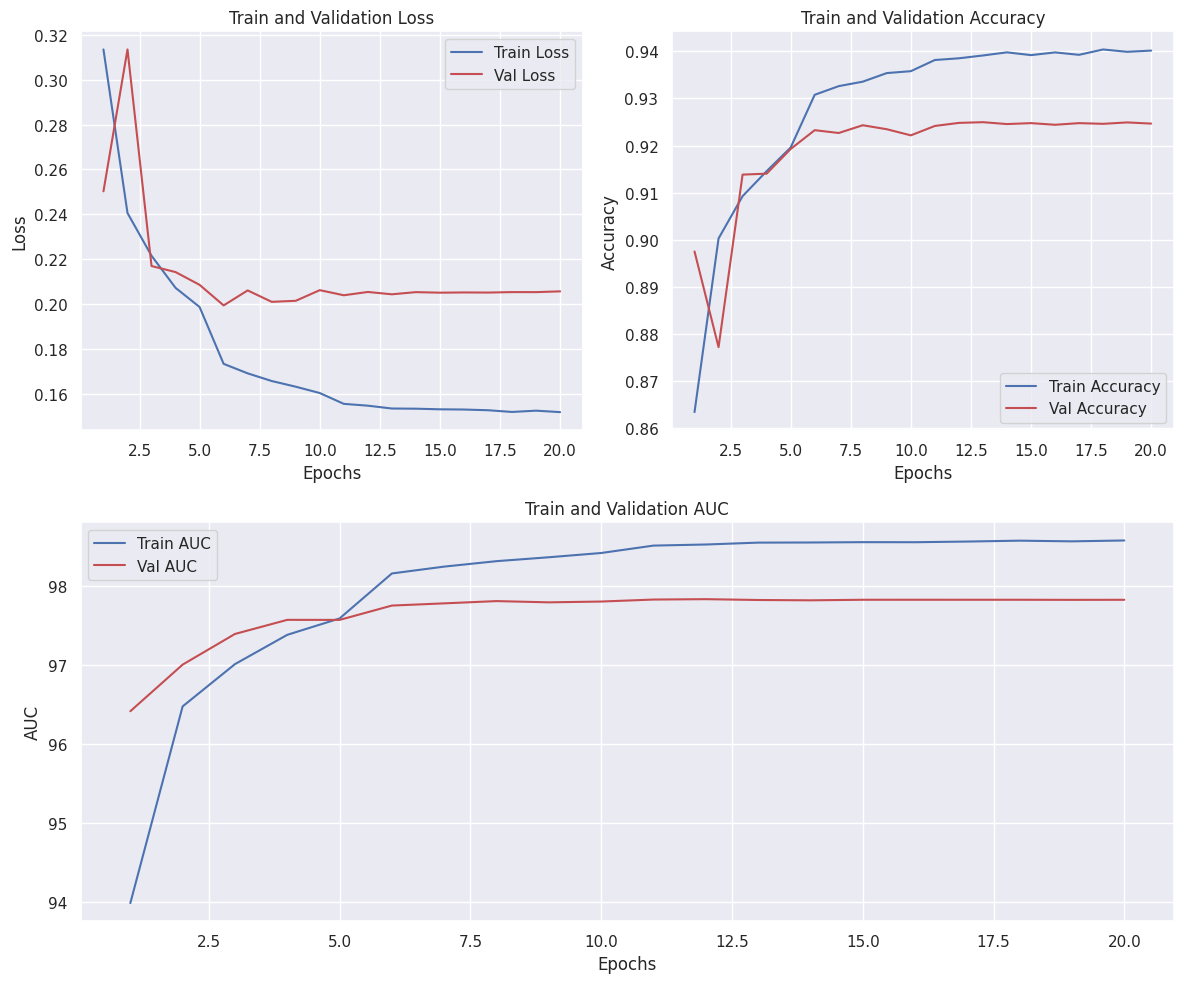

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU